# Cars selling

##### Made by: Pavlo Kukurik, Sviatoslav Sharak

## **DATA DESCRIPTION**
 * **Size:** We have 558,837 observations (data points). 
* **Features (16 total):**
    * **Quantitative Features (Features with numerical values)**
        * **`year`** (int64): The vehicle's manufacturing year.
        * **`condition`** (float64):  The condition of the vehicle (likely on a numerical scale).
        * **`odometer`** (float64): The vehicle's mileage.
        * **`mmr`** (float64):  The Mannheim Market Report value (estimated market value).
        * **`sellingprice`** (float64): The final price at which the vehicle was sold.

    * **Qualitative Features (Features with categorical values)**
        * **`make`** (object): The vehicle's brand/manufacturer.
        * **`model`** (object):  The vehicle's specific model.
        * **`trim`** (object): Additional specification within the model.
        * **`body`** (object):  The vehicle's body type (e.g., Sedan, SUV, etc.).
        * **`transmission`** (object): The type of transmission (e.g., automatic, manual).
        * **`vin`** (object): The vehicle's unique Vehicle Identification Number.
        * **`state`** (object): The state where the vehicle is registered.
        * **`color`** (object): The vehicle's exterior color. 
        * **`interior`** (object): The vehicle's interior color.
        * **`seller`** (object): The entity that sold the vehicle.
        * **`saledate`** (object): The date and time of the sale.


In [1]:
# importing libraries
import re
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('car_prices.csv', sep=',')
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [3]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


### **Firstly Let`s clean our dataset**

In [4]:
# First let`s drop useless columns (vin, seller).
if 'vin' in df.columns:
    df = df.drop(columns='vin')

if 'seller' in df.columns:
    df = df.drop(columns='seller')

# # Delete all NaN rows from dataset    
df = df.dropna()

In [5]:
# Let`s check how many values in each column are NaM
df.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
state           0
condition       0
odometer        0
color           0
interior        0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [6]:
# # Here we can see how df has changed 
df.describe()

,year,condition,odometer,mmr,sellingprice
count,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000
mean,2010.210980,30.774177,66701.732040,13837.058964,13690.512058
std,3.822151,13.286866,51939.586894,9532.229273,9613.033738
min,1990.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,24.000000,28137.000000,7425.000000,7200.000000
50%,2012.000000,35.000000,51085.000000,12300.000000,12200.000000
75%,2013.000000,41.000000,96590.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [7]:
def has_no_capital_letters(text: str) -> bool:
    """
    Func check if value in col has no cap letter
    :param text: teat of var
    :return: bool
    """
    return not bool(re.search(r'[A-Z]', text))

bad_make_labels=[make for make in df['make'].unique() if has_no_capital_letters(make)]
make_labels_dict={bad_make_label:bad_make_label.title() for bad_make_label in bad_make_labels}

In [8]:
df['make']=df['make'].apply(lambda x:make_labels_dict[x] if x in make_labels_dict else x)
# sorted(df['make'].dropna().unique().tolist())

In [9]:
make_labels_dict_2={
    'Bmw':'BMW',
    'Ford Tk':'Ford Truck',
    'Gmc':'GMC',
    'Gmc Truck':'GMC Truck',
    'Landrover':'Land Rover',
    'Mercedes-B':'Mercedes-Benz',
    'Mercedes':'Mercedes-Benz',
    'Vw':'Volkswagen',
}

df['make']=df['make'].apply(lambda x:make_labels_dict_2[x] if x in make_labels_dict_2 else x)
df['make']=df['make'].str.replace(' Tk', ' Truck',regex=True)
df['make'].nunique()

53

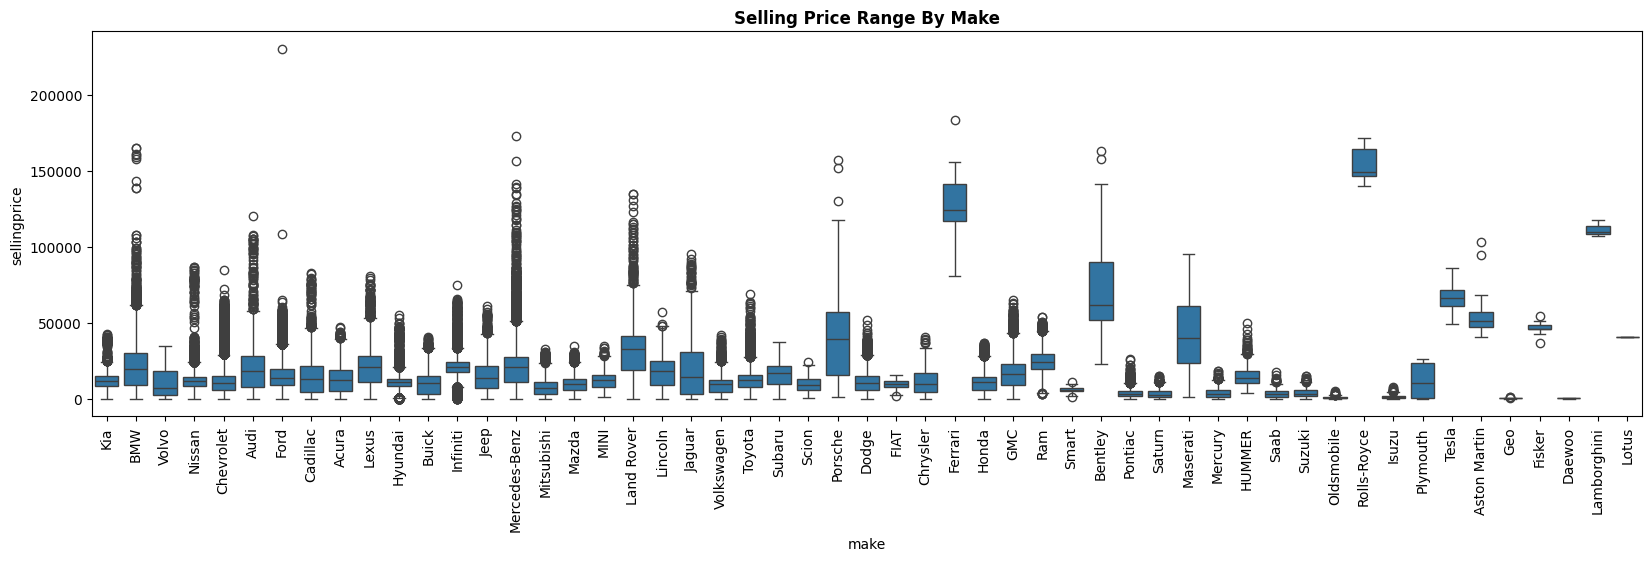

In [10]:
plt.figure(figsize=(20,5))
sns.boxplot(df,x='make',y='sellingprice')
plt.title('Selling Price Range By Make',fontweight='bold')
plt.xticks(rotation=90)
plt.show()

In [11]:
bad_body_labels = [body for body in df['body'].unique() if has_no_capital_letters(body)]
body_labels_dict = {bad_body_label: bad_body_label.title() for bad_body_label in bad_body_labels}
df['body'] = df['body'].apply(lambda x: body_labels_dict[x] if x in body_labels_dict else x)
sorted(df['body'].dropna().unique().tolist())

['Access Cab',
 'Beetle Convertible',
 'CTS Coupe',
 'CTS Wagon',
 'CTS-V Coupe',
 'CTS-V Wagon',
 'Cab Plus',
 'Cab Plus 4',
 'Club Cab',
 'Convertible',
 'Coupe',
 'Crew Cab',
 'CrewMax Cab',
 'Crewmax Cab',
 'Cts Coupe',
 'Cts Wagon',
 'Cts-V Coupe',
 'Double Cab',
 'E-Series Van',
 'Elantra Coupe',
 'Extended Cab',
 'G Convertible',
 'G Coupe',
 'G Sedan',
 'G37 Convertible',
 'G37 Coupe',
 'Genesis Coupe',
 'GranTurismo Convertible',
 'Granturismo Convertible',
 'Hatchback',
 'King Cab',
 'Koup',
 'Mega Cab',
 'Minivan',
 'Promaster Cargo Van',
 'Q60 Convertible',
 'Q60 Coupe',
 'Quad Cab',
 'Ram Van',
 'Regular Cab',
 'Regular-Cab',
 'SUV',
 'Sedan',
 'SuperCab',
 'SuperCrew',
 'Supercab',
 'Supercrew',
 'Suv',
 'TSX Sport Wagon',
 'Transit Van',
 'Tsx Sport Wagon',
 'Van',
 'Wagon',
 'Xtracab']

In [12]:
car_body_mapping = {
    'Access Cab': 'Cab',
    'Beetle Convertible': 'Convertible',
    'CTS Coupe': 'Coupe',
    'CTS Wagon': 'Wagon',
    'CTS-V Coupe': 'Coupe',
    'CTS-V Wagon': 'Wagon',
    'Cab Plus': 'Cab',
    'Cab Plus 4': 'Cab',
    'Club Cab': 'Cab',
    'Convertible': 'Convertible',
    'Coupe': 'Coupe',
    'Crew Cab': 'Cab',
    'CrewMax Cab': 'Cab',
    'Crewmax Cab': 'Cab',
    'Cts Coupe': 'Coupe',
    'Cts Wagon': 'Wagon',
    'Cts-V Coupe': 'Coupe',
    'Double Cab': 'Cab',
    'E-Series Van': 'Van',
    'Elantra Coupe': 'Coupe',
    'Extended Cab': 'Cab',
    'G Convertible': 'Convertible',
    'G Coupe': 'Coupe',
    'G Sedan': 'Sedan',
    'G37 Convertible': 'Convertible',
    'G37 Coupe': 'Coupe',
    'Genesis Coupe': 'Coupe',
    'GranTurismo Convertible': 'Convertible',
    'Granturismo Convertible': 'Convertible',
    'Hatchback': 'Hatchback',
    'King Cab': 'Cab',
    'Koup': 'Coupe',
    'Mega Cab': 'Cab',
    'Minivan': 'Van',
    'Promaster Cargo Van': 'Van',
    'Q60 Convertible': 'Convertible',
    'Q60 Coupe': 'Coupe',
    'Quad Cab': 'Cab',
    'Ram Van': 'Van',
    'Regular Cab': 'Cab',
    'Regular-Cab': 'Cab',
    'SUV': 'SUV',
    'Sedan': 'Sedan',
    'SuperCab': 'Cab',
    'SuperCrew': 'Cab',
    'Supercab': 'Cab',
    'Supercrew': 'Cab',
    'Suv': 'SUV',
    'TSX Sport Wagon': 'Wagon',
    'Transit Van': 'Van',
    'Tsx Sport Wagon': 'Wagon',
    'Van': 'Van',
    'Wagon': 'Wagon',
    'Xtracab': 'Cab'
}

df['body']=df['body'].apply(lambda x:car_body_mapping[x] if x in car_body_mapping else x)
df['body']=df['body'].str.replace(' Tk', ' Truck',regex=True)
df['body'].value_counts()

Sedan          218237
SUV            120968
Cab             40496
Van             26633
Hatchback       23821
Coupe           18161
Wagon           14263
Convertible      9746
Name: body, dtype: int64

In [13]:
df['transmission']=df['transmission'].apply(lambda x:x if x in ['automatic','manual'] else np.nan)
df['transmission'].unique()

array(['automatic', 'manual'], dtype=object)

In [14]:
df['state']=df['state'].apply(lambda x:x if len(x)==2 else None)
df['state']=df['state'].str.upper()

<Axes: title={'center': 'odometer vs sellingprice'}, xlabel='condition', ylabel='sellingprice'>

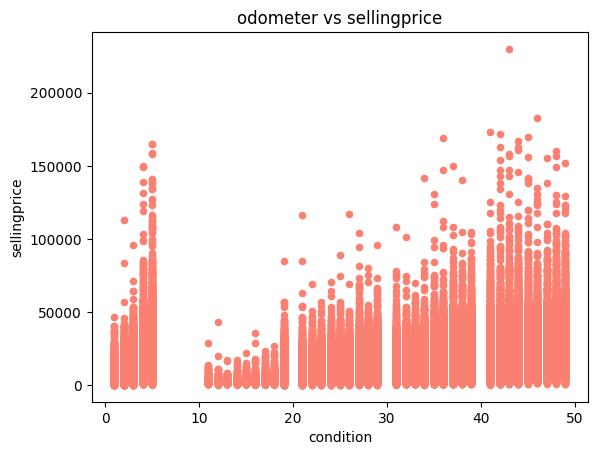

In [15]:
# Before scaling
df.plot.scatter(x='condition',y='sellingprice',title='odometer vs sellingprice', color='salmon')

<Axes: title={'center': 'odometer vs sellingprice'}, xlabel='condition', ylabel='sellingprice'>

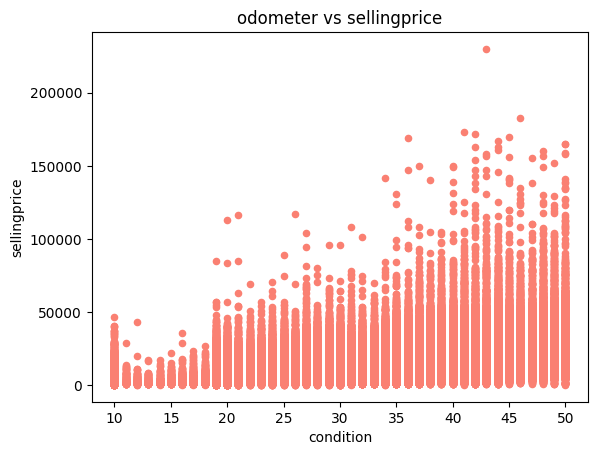

In [16]:
# some condition values range between 1 and 5, some between 10 and 50
# scale is different for these two groups

#1==10, 2==20... 5==50 as we understand it
df['condition']=df['condition'].apply(lambda x:x*10 if x<=5 else x)

# After transformation
df.plot.scatter(x='condition',y='sellingprice',title='odometer vs sellingprice', color='salmon')

In [17]:
colors=[]

for color in df['color']:
    if any([i in str(color) for i in ['1','2','3','4','5','6','7','8','9']]):
        colors.append(None)
    else:
        colors.append(color)

df['color']=colors
df['color']=df['color'].replace('—',np.nan)
# df['color'].unique().tolist()

In [18]:
df['interior']=df['interior'].replace('—',np.nan)
df['interior'].nunique()

16

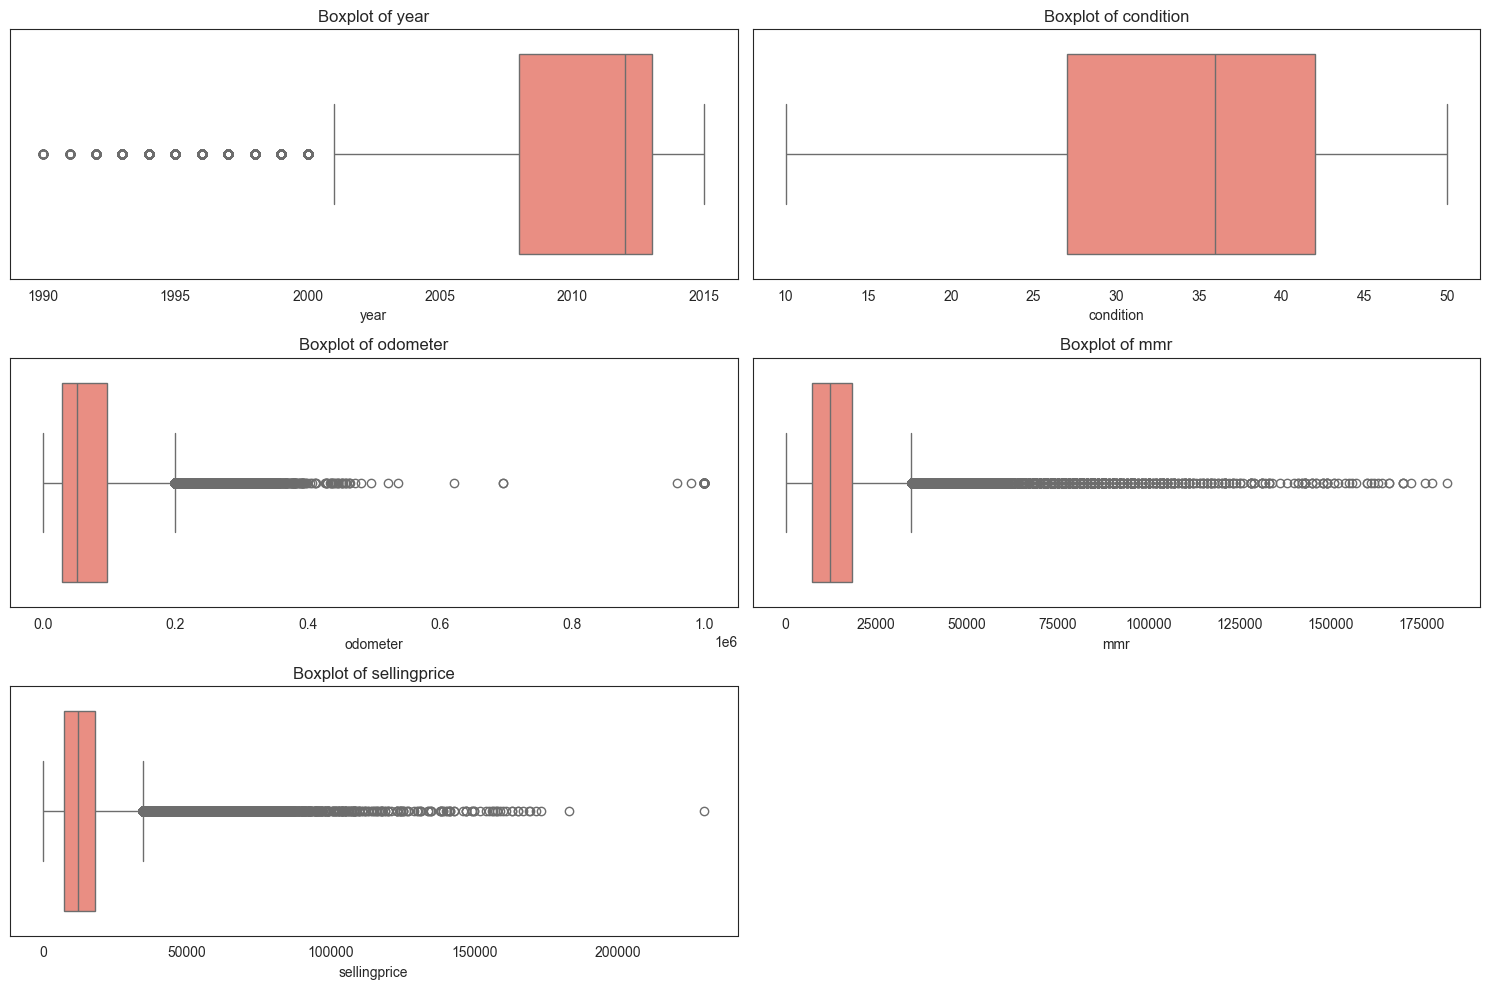

In [19]:
# Let visualise boxplot to see outliers for each numeric columns
def box_plot(data: pd.DataFrame) -> plt:
    """
    The func visualise the boxplot
    :param data: name of dataframe
    :return: plot
    """
    sns.set_style("white")
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    plt.figure(figsize=(15, 10))
    
    for i, col in enumerate(numeric_cols):
        plt.subplot(len(numeric_cols)//2 + 1, 2, i+1)
        sns.boxplot(x=data[col], color='salmon')
        plt.title(f'Boxplot of {col}', fontsize=12)
        plt.xlabel(col, fontsize=10)
    plt.tight_layout()
    plt.show()
    
box_plot(df)

In [20]:
def bound_counter(data: pd.DataFrame) -> tuple[pd, pd]:
    """
    The func calculate upper and lower bounds
    :param data: name of dataset
    :return: values of bounds
    """
    Q1 = data.quantile(0.25, numeric_only=True)
    Q3 = data.quantile(0.75, numeric_only=True)
    
    IQR = Q3 - Q1
    
    threshold = 1.5
    
    lower_bound_ = Q1 - threshold * IQR
    upper_bound_ = Q3 + threshold * IQR
    
    return lower_bound_, upper_bound_
    
def outliers_counter(data: pd.DataFrame) -> str:
    """
    The func calculate number of outliers for each column in the dataset 
    :param data: name of dataset
    :return: number of outliers for each column
    """
    # df_clipped = data.clip(lower=lower_bound, upper=upper_bound, axis=1)

    outliers_count = ((data.select_dtypes(include=['float64', 'int64']) < bound_counter(data)[0]) |
                      (data.select_dtypes(include=['float64', 'int64']) > bound_counter(data)[1])).sum()

    return f"Number of outliers for each numerical column:\n{outliers_count}"

print(outliers_counter(df))

Number of outliers for each numerical column:
year             9799
condition           0
odometer         9029
mmr             14038
sellingprice    14118
dtype: int64


Number of outliers for each numerical column:
year               0
condition          0
odometer        2271
mmr             3070
sellingprice    2729
dtype: int64


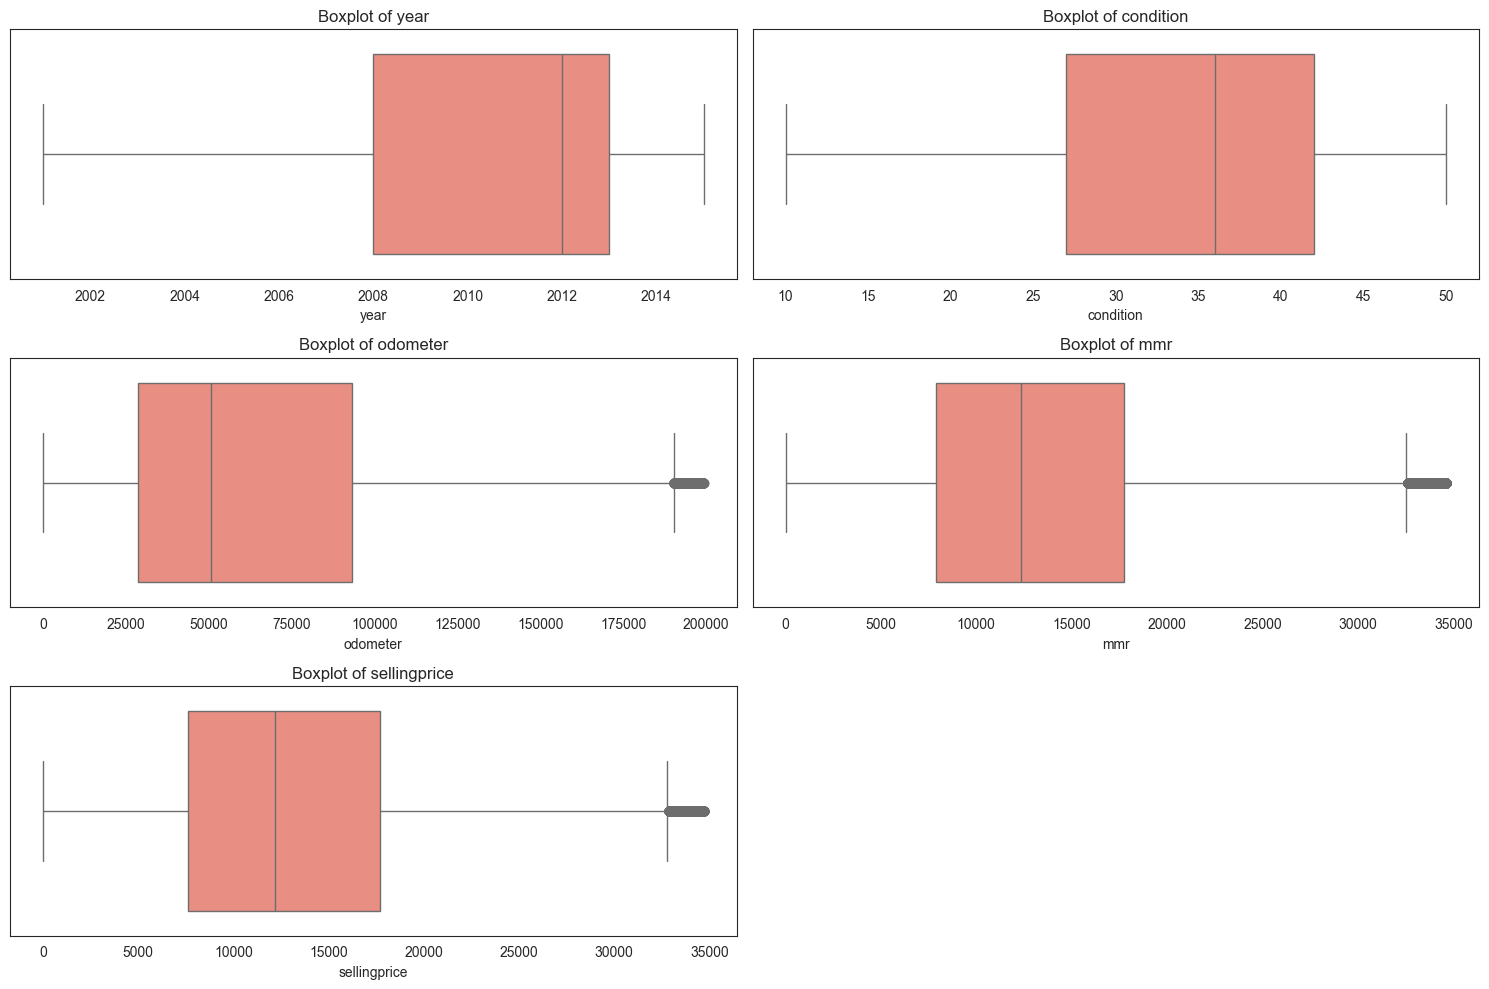

In [21]:
lower_bound, upper_bound = bound_counter(df)
    
mask = ((df.select_dtypes(include=['float64', 'int64']) >= lower_bound) & 
        (df.select_dtypes(include=['float64', 'int64']) <= upper_bound))

clean_data = df[mask.all(axis=1)]
print(outliers_counter(clean_data))
box_plot(clean_data)

In [22]:
clean_data = clean_data.copy()
clean_data['saledate'] = pd.to_datetime(clean_data['saledate'], utc=True)
clean_data['sale_year'] = clean_data['saledate'].dt.year
# we need only information about cars witch was sold in 2015. So let`s remove 2014
clean_data = clean_data[clean_data['sale_year'] == 2015]

In [23]:
clean_data['trim'].value_counts()
# altima = clean_data[clean_data['model'] == 'Altima'].copy()
# altima['trim'].unique()

Base                    40019
SE                      36090
LX                      16290
Limited                 13841
LT                      13532
                        ...  
3.0 R                       1
SE-V6 Dessert Runner        1
LT Eco                      1
GS Plus                     1
Power Wagon                 1
Name: trim, Length: 1273, dtype: int64

### **Now when we clear our dataset from Nan values and useless columns let`s see some interesting information that consider this dataset**

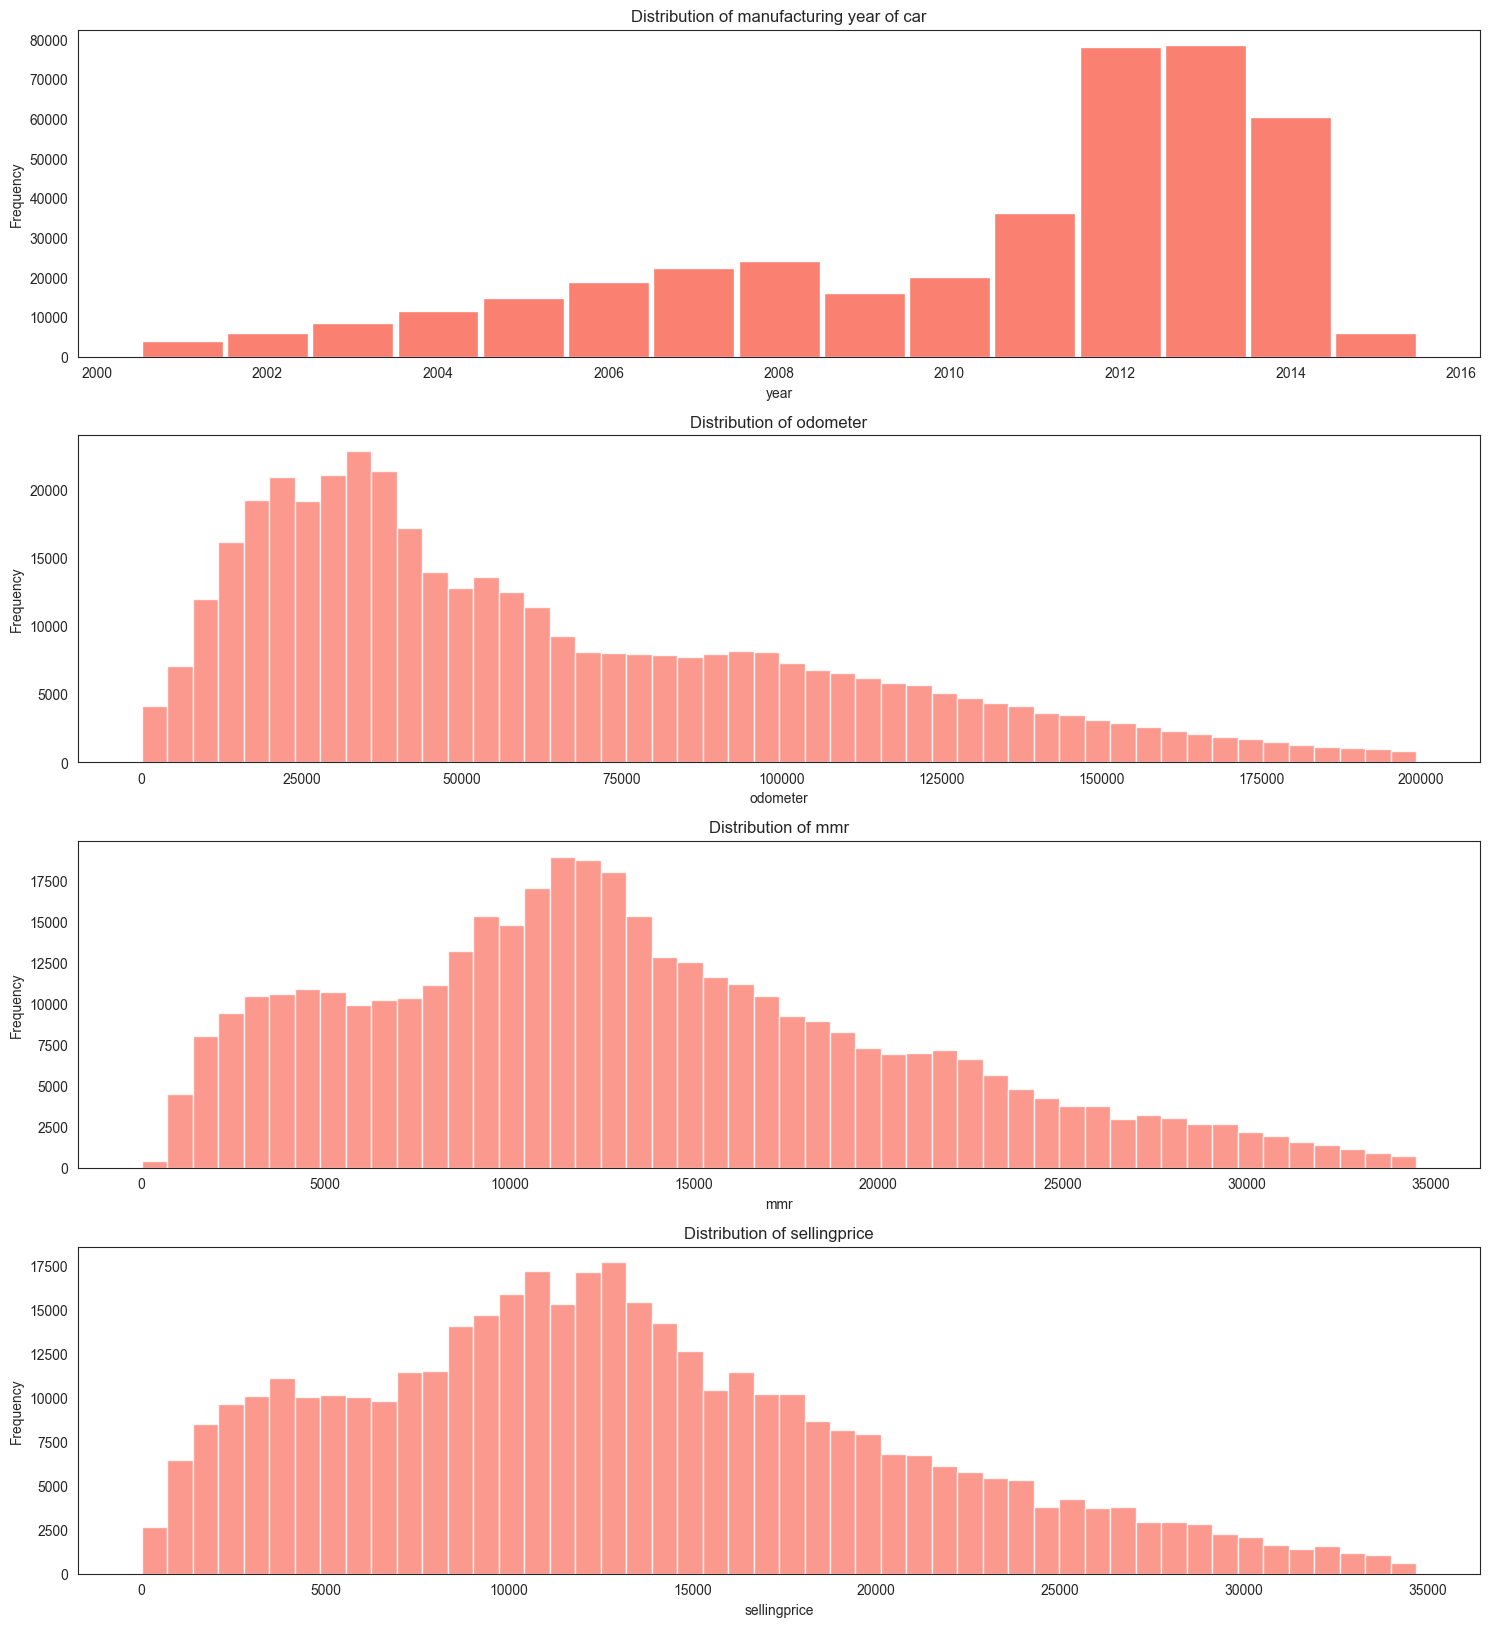

In [24]:
# plt.style.use('seaborn-white')

def plot_distribution(data_name: pd.DataFrame, column_name: list[str]) -> None:
    """
    The func plot distribution for columns in the dataframe
    :param data_name: Name of data
    :param column_name: name of column to plot
    """
    num_plots = len(column_name) + 1
    plt.figure(figsize=(15, 20))

    for num, name in enumerate(column_name, start=1):
        plt.subplot(num_plots, 1, num)
        if name == 'year':
            cars_sold_by_year = data_name[name].value_counts().sort_index()
            plt.bar(cars_sold_by_year.index, cars_sold_by_year.values, color='salmon', width=0.95)
            plt.title('Distribution of manufacturing year of car')

        else:
            plt.hist(data_name[name], bins=50, color='salmon', alpha=0.8)
            plt.title(f'Distribution of {name}')
            
        plt.xlabel(f'{name}')
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

plot_distribution(clean_data, ['year', 'odometer', 'mmr', 'sellingprice'])

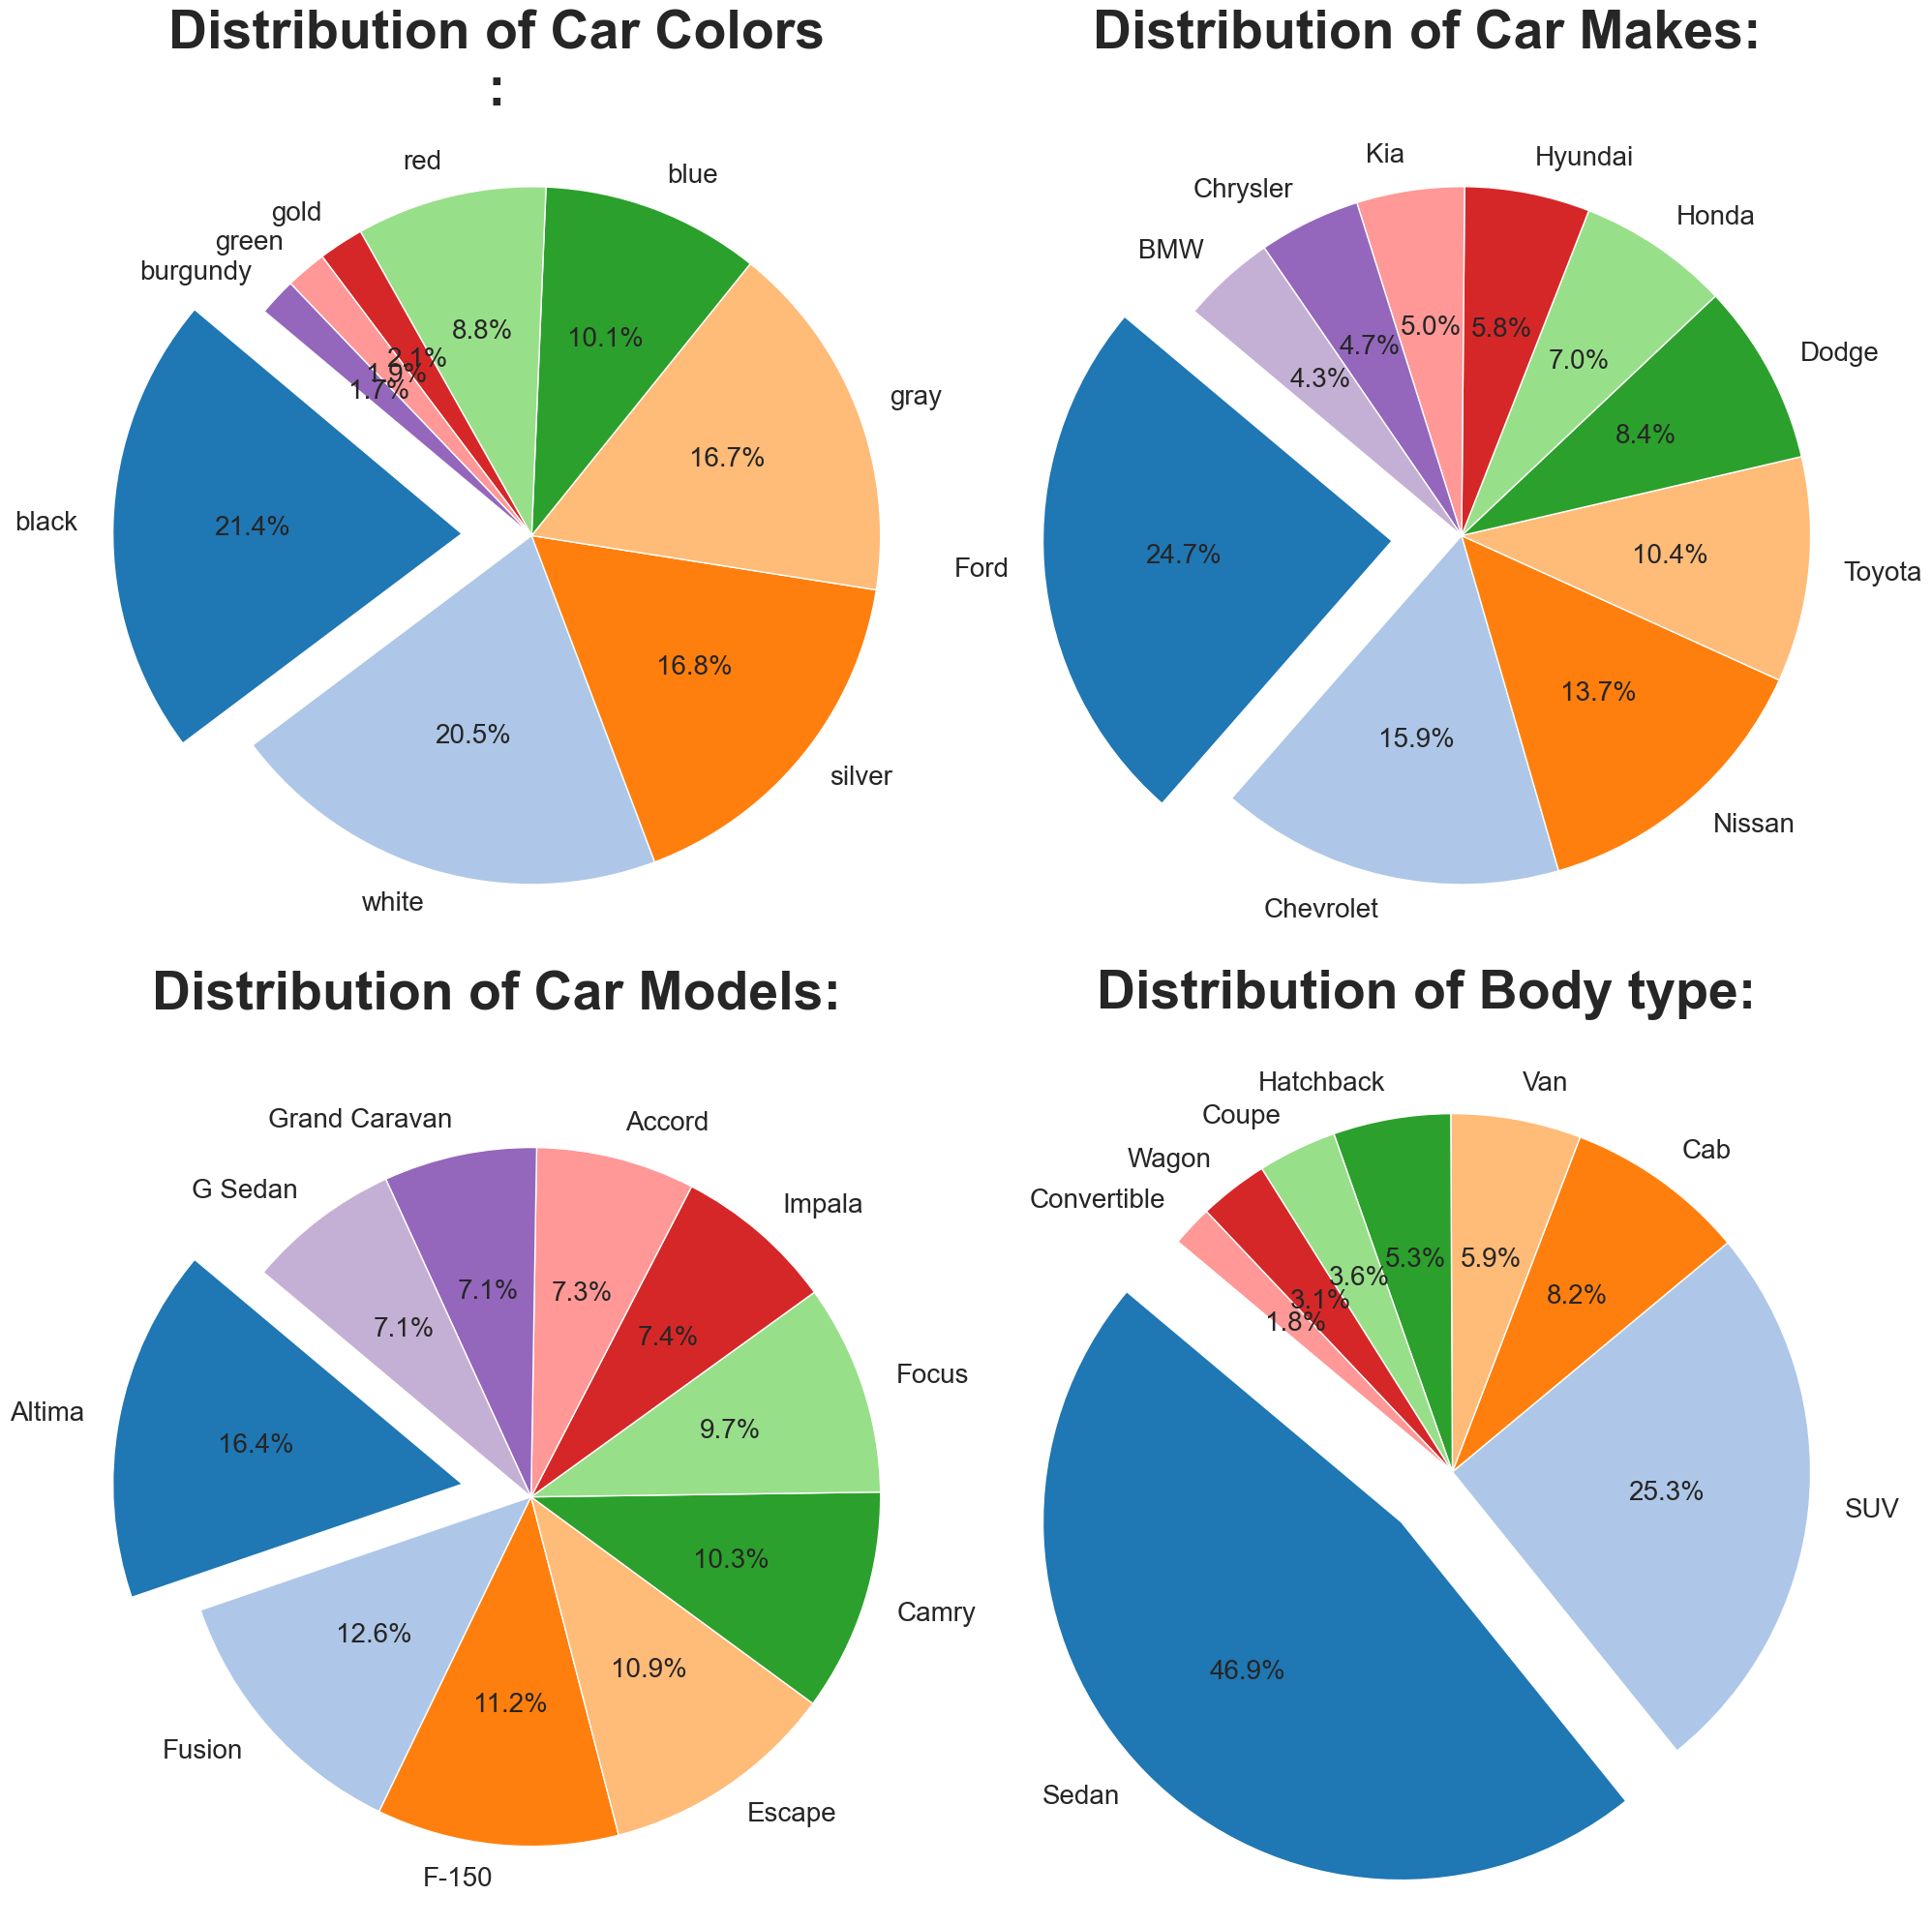

In [25]:
# Let`s see the moat popular color, model and brand
def plot_pie_chart(column, title, limit=10, ax=None):
    """
    The function plots a pie chart diagram
    :param column: name of column in dataset to plot
    :param title: title of plot
    :param limit: limit of chart
    :param ax: matplotlib axes to plot on
    :return: plot
    """
    counts = clean_data[column].value_counts().head(limit)
    colours = plt.cm.tab20.colors[:len(counts)]
    explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0)[:limit]
    
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=colours,
           explode=explode, wedgeprops=dict(width=1), textprops={'fontsize': 20})
    ax.set_title(title, fontsize=40, fontweight='bold')
    ax.axis('equal')

fig, axs = plt.subplots(2, 2, figsize=(20, 20))

plot_pie_chart('color', 'Distribution of Car Colors\n:', limit=9, ax=axs[0, 0])
plot_pie_chart('make', 'Distribution of Car Makes:\n', ax=axs[0, 1])
plot_pie_chart('model', 'Distribution of Car Models:\n', ax=axs[1, 0])
plot_pie_chart('body', 'Distribution of Body type:\n', limit=8, ax=axs[1, 1])

plt.tight_layout()
plt.show()

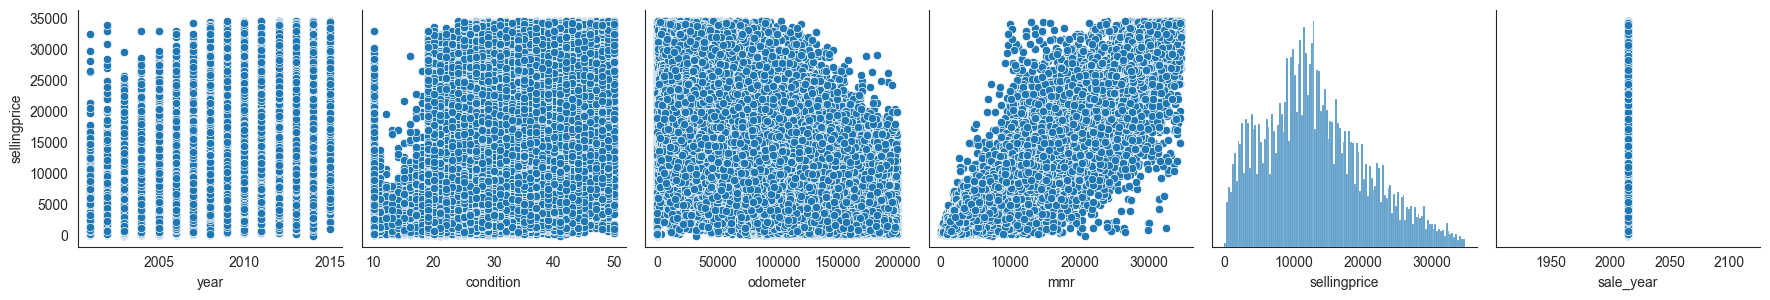

In [26]:
sns.pairplot(data=clean_data, y_vars='sellingprice', height=3, kind='scatter')
plt.show()

In [27]:
# clean_data
# 
# for col in clean_data.select_dtypes(object):
#     dummies=pd.get_dummies(clean_data[col],prefix=col,dummy_na=False)
#     clean_data=clean_data.drop(columns=col)
#     clean_data=pd.concat([clean_data,dummies],axis=1)

# clean_data
# clean_data = clean_data[clean_data['make'] == 'Ford']
# clean_data['trim'].nunique()
clean_data

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice,saledate,sale_year
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,CA,45.0,1331.0,gray,black,31900.0,30000.0,2015-01-14 20:30:00+00:00,2015
3,2015,Volvo,S60,T5,Sedan,automatic,CA,41.0,14282.0,white,black,27500.0,27750.0,2015-01-28 20:30:00+00:00,2015
9,2014,Chevrolet,Camaro,LT,Convertible,automatic,CA,30.0,4809.0,red,black,26300.0,17500.0,2015-01-19 20:00:00+00:00,2015
12,2015,Ford,Fusion,SE,Sedan,automatic,CA,20.0,5559.0,white,beige,15350.0,12000.0,2015-01-13 04:00:00+00:00,2015
20,2015,Chevrolet,Impala,LTZ,Sedan,automatic,CA,19.0,14538.0,silver,black,24300.0,7200.0,2015-07-07 02:30:00+00:00,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2011,BMW,5 Series,528i,Sedan,automatic,FL,39.0,66403.0,white,brown,20300.0,22800.0,2015-07-06 23:15:00+00:00,2015
558833,2012,Ram,2500,Power Wagon,Cab,automatic,WA,50.0,54393.0,white,black,30200.0,30800.0,2015-07-08 02:30:00+00:00,2015
558834,2012,BMW,X5,xDrive35d,SUV,automatic,CA,48.0,50561.0,black,black,29800.0,34000.0,2015-07-08 02:30:00+00:00,2015
558835,2015,Nissan,Altima,2.5 S,Sedan,automatic,GA,38.0,16658.0,white,black,15100.0,11100.0,2015-07-08 23:45:00+00:00,2015


In [28]:
if 'transmission' in clean_data.columns:
    clean_data["transmission"] = clean_data['transmission'].apply(lambda x: 1 if x == 'automatic' else 0)
    clean_data.rename(columns={'transmission': 'is_automatic'}, inplace=True)
    
base_data = clean_data[clean_data['make'].apply(
                        lambda x: x == 'Ford' or x == 'Chevrolet' or
                                  x == 'Nissan' or x == 'Toyota')]

base_data.model.value_counts()
# base_data = base_data[base_data['model'].apply(
#                              lambda x: x == 'Fusion'
#                                     or x == 'Escape' or x =='Focus'
#                                     or x =='F-150' or x == 'Explorer'
#                                     or x == 'Edge' or x =='Mustang')]

# clean_data.make.value_counts()
base_data = base_data.copy()
base_data.loc[:, 'is_ford'] = base_data['make'].apply(lambda x: 1 if x == 'Ford' else 0)
base_data.loc[:, 'is_chevrolet'] = base_data['make'].apply(lambda x: 1 if x == 'Chevrolet' else 0)
base_data.loc[:, 'is_nissan'] = base_data['make'].apply(lambda x: 1 if x == 'Nissan' else 0)
base_data.loc[:, 'is_toyota'] = base_data['make'].apply(lambda x: 1 if x == 'Toyota' else 0)

In [29]:
model_counts = base_data.groupby('make')['model'].value_counts()
top_models_by_make = model_counts.groupby(level=0).nlargest(3).reset_index(level=0, drop=True).index
base_data = base_data[base_data.set_index(['make', 'model']).index.isin(top_models_by_make)]

model_dummies = pd.get_dummies(base_data['model'])
base_data = pd.concat([base_data, model_dummies], axis=1)

if 'make' or 'trim' or 'saledate' or 'interior' or 'model' in base_data.columns:
    base_data.drop(columns=['make', 'trim', 'saledate', 'interior', 'model'], inplace=True)
    
base_data

,year,body,is_automatic,state,condition,odometer,color,mmr,sellingprice,sale_year,...,Corolla,Cruze,Escape,F-150,Fusion,Impala,Malibu,Maxima,RAV4,Rogue
12,2015,Sedan,1,CA,20.0,5559.0,white,15350.0,12000.0,2015,...,0,0,0,0,1,0,0,0,0,0
20,2015,Sedan,1,CA,19.0,14538.0,silver,24300.0,7200.0,2015,...,0,0,0,0,0,1,0,0,0,0
47,2014,Sedan,1,CA,34.0,40661.0,silver,13050.0,13000.0,2015,...,0,1,0,0,0,0,0,0,0,0
56,2015,Sedan,1,CA,10.0,6105.0,silver,16600.0,9800.0,2015,...,0,0,0,0,0,0,1,0,0,0
88,2014,Sedan,1,CA,42.0,39623.0,blue,13350.0,13200.0,2015,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558758,2014,Sedan,1,NY,47.0,10771.0,silver,19650.0,23500.0,2015,...,0,0,0,0,0,0,0,0,0,0
558790,2013,Sedan,1,CA,35.0,35950.0,gray,14800.0,12800.0,2015,...,0,0,0,0,0,0,0,1,0,0
558821,2012,SUV,1,FL,38.0,74673.0,white,11550.0,11400.0,2015,...,0,0,1,0,0,0,0,0,0,0
558835,2015,Sedan,1,GA,38.0,16658.0,white,15100.0,11100.0,2015,...,0,0,0,0,0,0,0,0,0,0


In [30]:
from math import log
def dummy_top_freq(data_name: pd.DataFrame, column_names: list[str], top_n: int=4) -> pd.DataFrame:
    """
    The func add dummy vars ro data
    :param data_name: name of dataframe
    :param column_names: name of column
    :param top_n: The n most freq vars
    :return: updated dataframe
    """
    data_name = data_name.copy()
    
    for col in column_names:
        if col in data_name.columns:
            top_values = data_name[col].value_counts().head(top_n).index.tolist()
            for value in top_values:
                data_name[f'is_{value.replace(" ", "_")}'] = (data_name[col] == value).astype(int)
        else: continue
            
    for i in column_names:
        if i in data_name.columns:
            data_name.drop(columns=i, inplace=True)
        else: continue
    return data_name

base_data = dummy_top_freq(base_data, ['body', 'color', 'state'])
base_data['is_automatic'].value_counts()
# for i in base_data.columns:
#     print(base_data[f"{i}"].value_counts())

base_data

,year,is_automatic,condition,odometer,mmr,sellingprice,sale_year,is_ford,is_chevrolet,is_nissan,...,is_Cab,is_Coupe,is_white,is_black,is_silver,is_gray,is_FL,is_CA,is_TX,is_IL
12,2015,1,20.0,5559.0,15350.0,12000.0,2015,1,0,0,...,0,0,1,0,0,0,0,1,0,0
20,2015,1,19.0,14538.0,24300.0,7200.0,2015,0,1,0,...,0,0,0,0,1,0,0,1,0,0
47,2014,1,34.0,40661.0,13050.0,13000.0,2015,0,1,0,...,0,0,0,0,1,0,0,1,0,0
56,2015,1,10.0,6105.0,16600.0,9800.0,2015,0,1,0,...,0,0,0,0,1,0,0,1,0,0
88,2014,1,42.0,39623.0,13350.0,13200.0,2015,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558758,2014,1,47.0,10771.0,19650.0,23500.0,2015,0,0,1,...,0,0,0,0,1,0,0,0,0,0
558790,2013,1,35.0,35950.0,14800.0,12800.0,2015,0,0,1,...,0,0,0,0,0,1,0,1,0,0
558821,2012,1,38.0,74673.0,11550.0,11400.0,2015,1,0,0,...,0,0,1,0,0,0,1,0,0,0
558835,2015,1,38.0,16658.0,15100.0,11100.0,2015,0,0,1,...,0,0,1,0,0,0,0,0,0,0


### Build an OLS model

In [31]:
e_var = ['sellingprice', 'is_toyota', 'is_IL',
             'is_gray', 'is_Cab', 'RAV4',
             'Rogue', 'Escape', 'Cruze', 'is_automatic', 'mmr']

dep = [i for i in base_data.columns if i not in e_var]
X = base_data[dep]  
y = base_data['sellingprice']

X = sm.add_constant(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = sm.OLS(y_train, X_train).fit()

predictions = model.predict(X_test)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sellingprice   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                 1.409e+04
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        00:15:18   Log-Likelihood:            -6.6900e+05
No. Observations:               72477   AIC:                         1.338e+06
Df Residuals:                   72455   BIC:                         1.338e+06
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
year           655.9334      5.718    114.710      0.000     644.726     667.141
condition      129.8251      1.223    106.155      0.000     127.428     132.222
odometer        -0.0519      0.000   -132.902      0.000      -0.053      -0.051
sale_year     -647.7496      5.711   -113.425      0.000    -658.943    -636.556
is_ford      -1276.2798     59.975    -21.280      0.000   -1393.830   -1158.730
is_chevrolet -3841.8481     49.307    -77.918      0.000   -3938.489   -3745.207
is_nissan    -1910.3717     68.935    -27.713      0.000   -2045.483   -1775.260
Altima         -57.8378     45.280     -1.277      0.201    -146.586      30.910
Camry         -786.2451     43.321    -18.149      0.000    -871.155    -701.336
Corolla      -2699.9847     47.179    -57.228      0.000   -2792.456   -2607.514
F-150         5610.1937     36.379    154.215      0.000    5538.891    5681.496
Fusion        -653.3393     42.671    -15.311      0.000    -736.974    -569.704
Impala        1582.9064     52.489     30.157      0.000    1480.027    1685.785
Malibu        1418.3922     54.204     26.168      0.000    1312.153    1524.631
Maxima        3521.5732     53.630     65.664      0.000    3416.458    3626.689
is_Sedan     -2701.5449     31.778    -85.012      0.000   -2763.831   -2639.259
is_SUV       -1092.8332     27.620    -39.566      0.000   -1146.969   -1038.698
is_Coupe     -1816.1370     69.091    -26.286      0.000   -1951.554   -1680.720
is_white      -447.3544     24.969    -17.916      0.000    -496.293    -398.415
is_black       169.9071     25.832      6.577      0.000     119.277     220.537
is_silver     -151.7819     26.767     -5.671      0.000    -204.244     -99.319
is_FL          -88.4389     25.873     -3.418      0.001    -139.149     -37.729
is_CA         -136.1782     32.988     -4.128      0.000    -200.835     -71.521
is_TX         -232.1261     33.105     -7.012      0.000    -297.012    -167.240
==============================================================================
Omnibus:                    10785.030   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60716.413
Skew:                           0.599   Prob(JB):                         0.00
Kurtosis:                       7.321   Cond. No.                     1.22e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.19e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

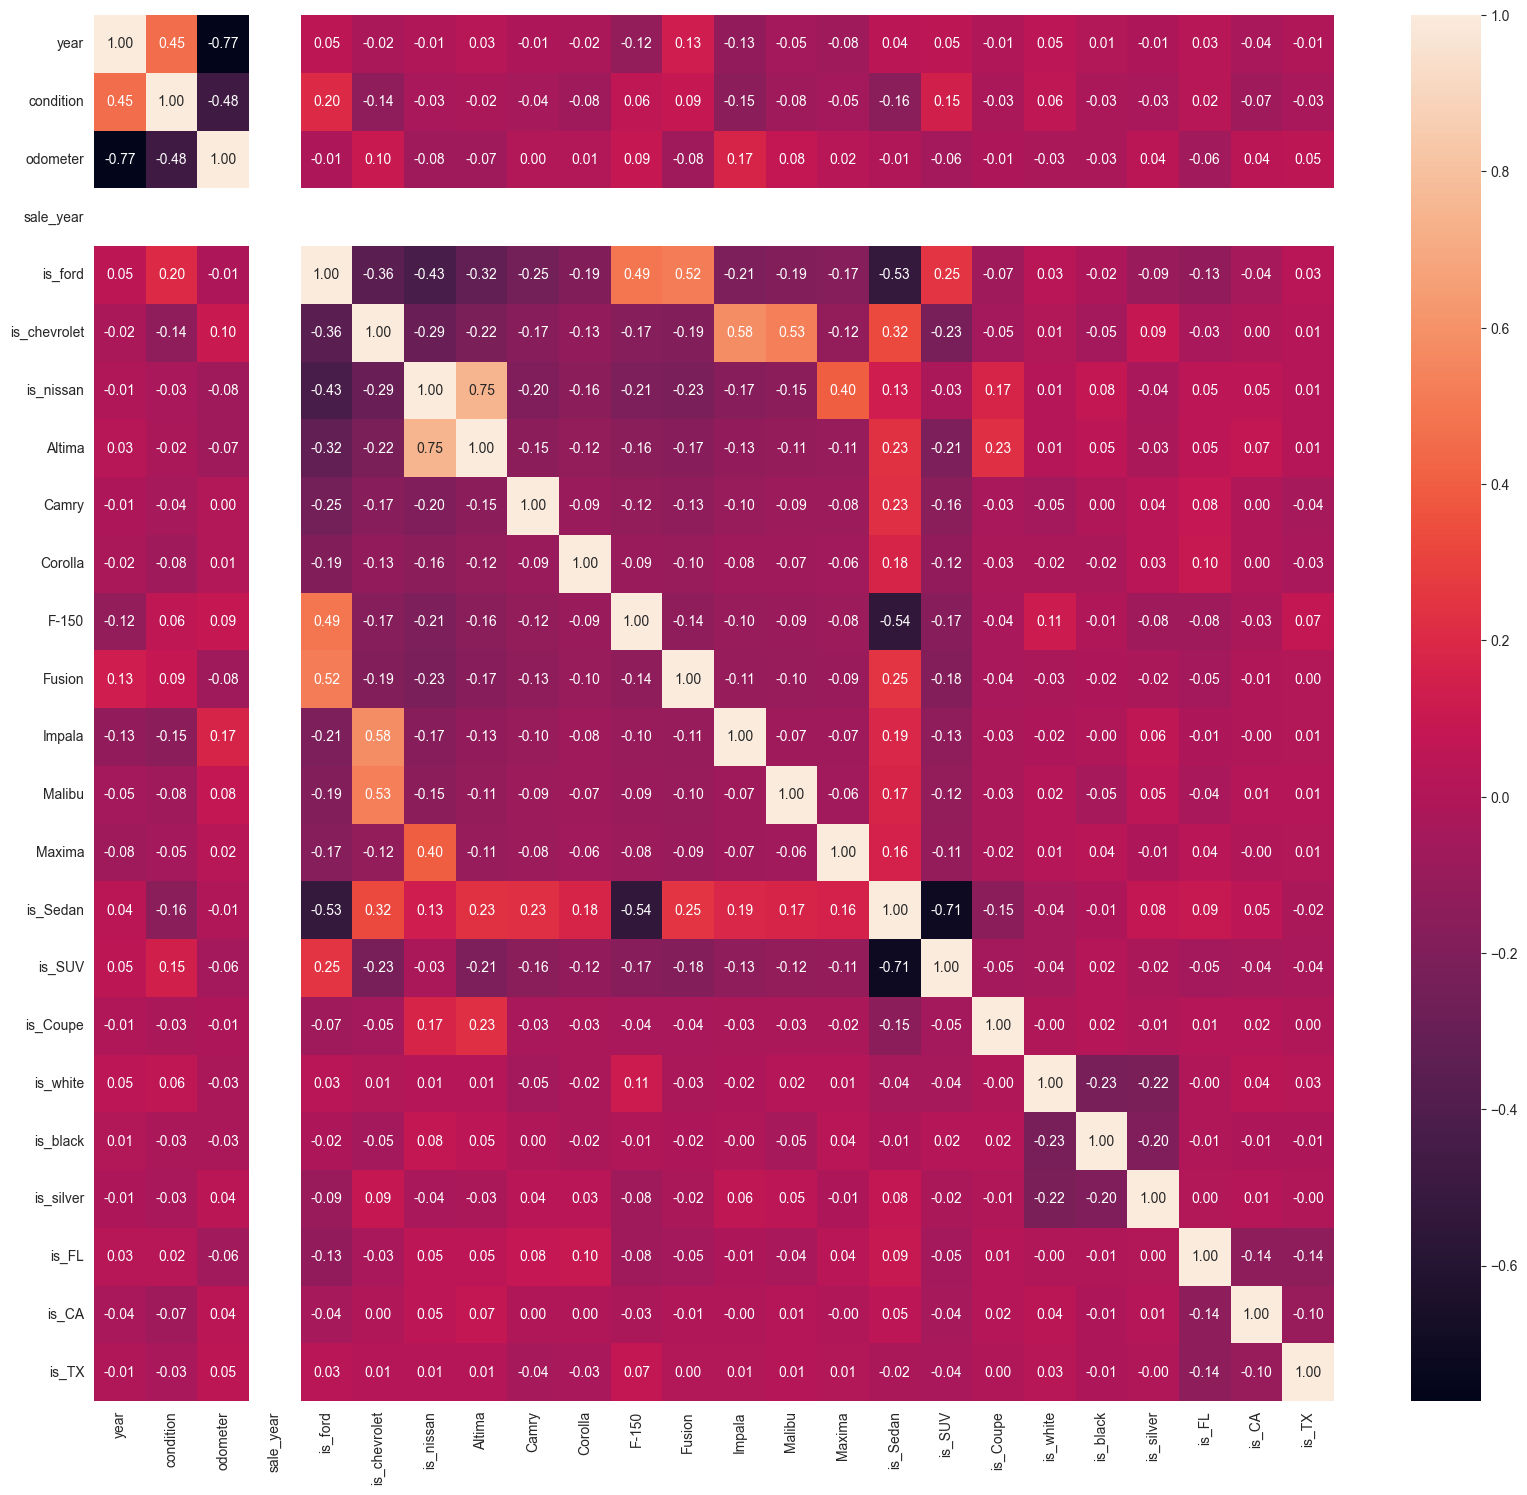

In [32]:
# Let check curvilinearity

correlation_matrix = X_train.corr()
plt.figure(figsize=(20, 18))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

In [110]:


nissan_altima_df = df[(df['make'].str.lower() == 'nissan') & (df['model'].str.lower() == 'altima')]
nissan_altima_df = nissan_altima_df.drop(columns=['mmr', 'make', 'model', 'saledate', 'interior', 'transmission'])
nissan_altima_df['trim'].value_counts()
nissan_altima_df = dummy_top_freq(nissan_altima_df, ['body', 'color', 'state', 'trim'], top_n=5)
nissan_altima_df = nissan_altima_df.drop(columns=['is_Coupe', 'is_2.5_S', 'is_CA'])

X = nissan_altima_df.drop('sellingprice', axis=1)
y = nissan_altima_df['sellingprice']

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.OLS(y_train, X_train).fit()

model_summary = model.summary()
print(model_summary)


The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
                            OLS Regression Results                            
Dep. Variable:           sellingprice   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     3911.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:20:55   Log-Likelihood:            -1.1508e+05
No. Observations:               13076   AIC:                         2.302e+05
Df Residuals:                   13058   BIC:                         2.303e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025  

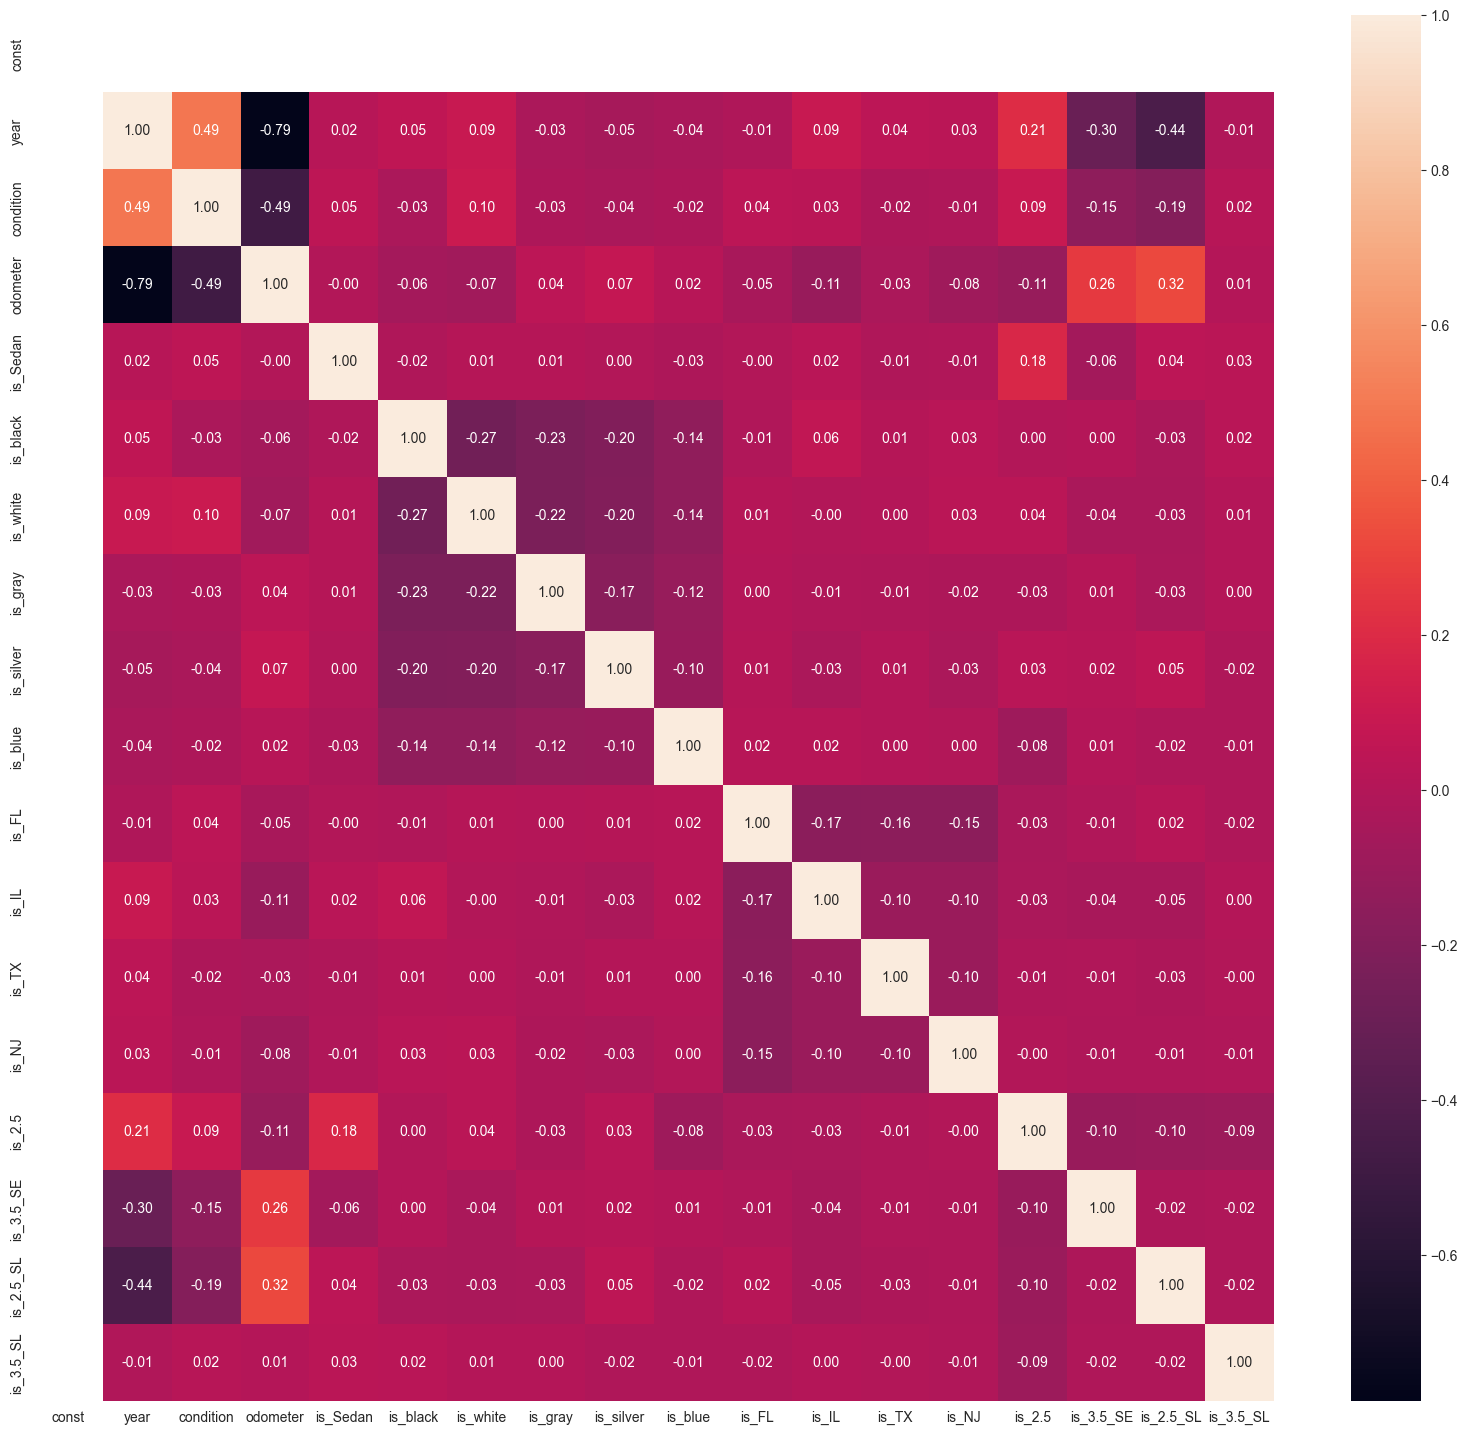

In [109]:
# Let check curvilinearity

correlation_matrix = X_train.corr()
plt.figure(figsize=(20, 18))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

In [107]:
nissan_altima_df.shape[0]

16346

base
2.5 S: This is the entry-level trim, providing the basic necessities with minimal frills. It's designed for affordability while still offering essential modern conveniences.
2.5: A slight upgrade over the 2.5 S, this trim still focuses on basic functionality but may include additional comfort or convenience features.
Performance Group
3.5 SE: This trim emphasizes enhanced performance with a 3.5-liter V6 engine and may include sportier handling characteristics.
3.5 SR: Also equipped with the 3.5-liter V6, this trim adds sport-tuned features and styling, making it the choice for those looking for a more dynamic driving experience.
Premium Group
2.5 SL: Focuses on luxury within the four-cylinder lineup, offering premium features such as leather upholstery, advanced technology, and comfort-driven amenities.
3.5 SL: Combines the luxury features of the SL trim with the power of a 3.5-liter V6 engine, providing both comfort and performance at a higher level.